In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

In [2]:
# Get data
dati_nazione = pd.read_csv('COVID-19/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv', sep=',', header=0)
dati_regioni = pd.read_csv('COVID-19/dati-regioni/dpc-covid19-ita-regioni.csv', sep=',', header=0)
dati_province = pd.read_csv('COVID-19/dati-province/dpc-covid19-ita-province.csv', sep=',', header=0)
x = range(0,len(dati_nazione.data))

## Modelli

### Esponenziale

$$f(x) = a\cdot e^{b\cdot x}$$

### Logistico

$$f(x) = \frac{L}{1+e^{-k\cdot(x-m)}}$$

In [3]:
# Define some functions

def malthus(x, a, b):
    return a * np.exp(b * x)

def logistic(x, L, k, m):
    return L /(1.0+np.exp(-k*(x-m)))

def prettyplot(plt, x, y, f1, f2, c1, c2):
    """
    Plot data and models of both exponential and logistic function.
    
    Parameters
    ----------
        x: x values
        y: y values
        f1: model 1 function
        f2: model 2 function
        c1: coefficients of model 1
        c2: coefficients of model 2
    Returns
    -------
        plot
    """
    plt.plot(x, f1(x, *c1), 'r-', label='exp fit: a=%5.3f, b=%5.3f' % tuple(c1))
    plt.plot(x, f2(x, *c2), 'g-', label='log fit: L=%5.3f, k=%5.3f, m=%5.3f' % tuple(c2))
    plt.scatter(x, y, label='dati nazionali', marker='.', color='k')
    plt.title('Andamento Nazionale')
    plt.xlabel('giorni')
    plt.ylabel('Totale casi attualmente positivi')
    plt.grid()
    plt.legend()         

## Casi nazionali

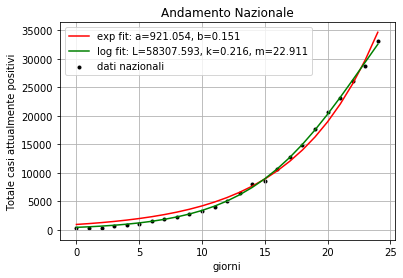

In [4]:
# Do curve fitting & plot results
param_bounds = [[0., 0, 10], [1e5, 1., 50.]]
coeff_e, cov_e = curve_fit(malthus, x, dati_nazione.totale_attualmente_positivi)
coeff_l, cov_l = curve_fit(logistic, x, dati_nazione.totale_attualmente_positivi, method='dogbox', bounds=(param_bounds[0], param_bounds[1]), maxfev=100)

prettyplot(plt, x, dati_nazione.totale_attualmente_positivi, malthus, logistic, coeff_e, coeff_l)
plt.show()    

In [5]:
# Get n days forecast
forecast_exp = malthus(23, *coeff_e)
forecast_log = logistic(23, *coeff_l)
print('Esponenziale: '+str(round(forecast_exp))+'\n'+
      'Logistica: '+str(round(forecast_log)))

Esponenziale: 29814.0
Logistica: 29433.0


## Previsioni a 50 giorni

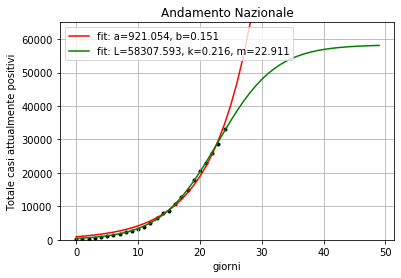

In [6]:
def prettyplot2(plt, x, f1, f2, c1, c2, scale):
    """
    Plot data and models of both exponential and logistic function.
    
    Parameters
    ----------
        x: x values
        y: y values
        f1: model 1 function
        f2: model 2 function
        c1: coefficients of model 1
        c2: coefficients of model 2
    Returns
    -------
        plot
    """
    plt.plot(x, f1(x, *c1), 'r-', label='fit: a=%5.3f, b=%5.3f' % tuple(c1))
    plt.plot(x, f2(x, *c2), 'g-', label='fit: L=%5.3f, k=%5.3f, m=%5.3f' % tuple(c2))
    plt.title('Andamento Nazionale')
    plt.xlabel('giorni')
    plt.ylabel('Totale casi attualmente positivi')
    plt.ylim([0,scale])
    plt.grid()
    plt.legend()  


xf = range(0, 50)


prettyplot2(plt, xf,  malthus, logistic, coeff_e, coeff_l, 65e3)
plt.scatter(x, dati_nazione.totale_attualmente_positivi, label='dati nazionali', marker='.', color='k')
plt.show()

## Derivata
Dalla derivata del modello, otteniamo il tasso di crescita. Il massimo di questa derivata rappresenta il picco nella crescita dei contagi.  
La derivata del modello logistico:  

$$ f(x) = \frac{kLe^{-k\cdot(x-m)}}{(1+e^{-k\cdot(x-m)})^2} $$

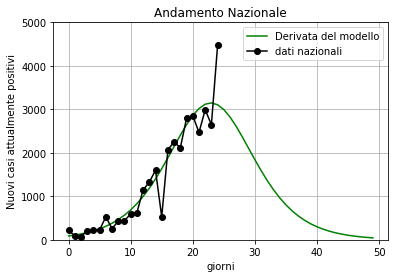

In [8]:
def dlogistic(x, L, k, m):
    return (k*L*np.exp(-k*(x-m)))/(1+np.exp(-k*(x-m)))**2


plt.plot(xf, dlogistic(xf, *coeff_l), 'g-', label="Derivata del modello")
plt.plot(x, dati_nazione.nuovi_attualmente_positivi, 'k-o', label='dati nazionali')
plt.title('Andamento Nazionale')
plt.xlabel('giorni')
plt.ylabel('Nuovi casi attualmente positivi')
plt.ylim([0,5e3])
plt.grid()
plt.legend()
plt.show()

## Casi Regionali

In [71]:
#dati_regioni.groupby('denominazione_regione').max().sort_values('nuovi_attualmente_positivi')

In [7]:
# Get regional data
dati_lombardia = dati_regioni.loc[dati_regioni['denominazione_regione'] == 'Lombardia']
dati_lazio = dati_regioni.loc[dati_regioni['denominazione_regione'] == 'Lazio']
x = range(0,len(dati_lombardia['data']))

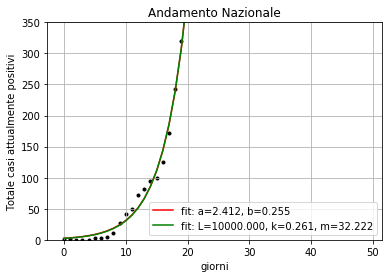

In [10]:
def func_l(x, a, b):
    return a * np.exp(b * x)

param_bounds = [[0., 0, 10], [1e4, 1., 50.]]
coeff_llazio, cov_llazio = curve_fit(logistic, x, dati_lazio.totale_attualmente_positivi, method='dogbox', bounds=(param_bounds[0], param_bounds[1]), maxfev=100)
coeff_elazio, cov_elazio = curve_fit(malthus, x, dati_lazio.totale_attualmente_positivi)

prettyplot2(plt, xf,  malthus, logistic, coeff_elazio, coeff_llazio, 3.5e2)
plt.scatter(x, dati_lazio.totale_attualmente_positivi, marker='.', color='k')
plt.show()

In [11]:
# Get n days forecast
forecast_exp = malthus(25, *coeff_elazio)
forecast_log = logistic(25, *coeff_llazio)
print('Esponenziale: '+str(round(forecast_exp))+'\n'+
      'Logistica: '+str(round(forecast_log)))

Esponenziale: 1427.0
Logistica: 1321.0
